In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime
%cd /Users/dane/src/datatools/js
import js_pd
c_xem = '#063CBF'
c_ana = '#EA3C00'

/Users/dane/src/datatools/js


In [2]:
sim = js_pd.read_and_validate('qtx_jobs.csv')
summary = {}
summary['start'] = sim.ix[0].submitted_date
summary['end'] = sim.ix[len(sim)-1].submitted_date
summary['sub_cnt'] = len(sim)
summary['comp_cnt'] = sim.duration_m.count()
summary['users'] = len(sim.user.value_counts())
summary['tot_hrs'] = int(sim.duration_m.sum() / 60.0)
summary['big'] = sim.working_set.max() / 1000.
summary['machines'] = len(sim.host.value_counts())

In [3]:
tmp = sim.convert_objects(convert_numeric=True) # this hoses exit_code
tmp.exit_code = sim.exit_code
sim = tmp
sim.submitted_date = pd.to_datetime(sim.submitted_date)
sim.start_date = pd.to_datetime(sim.start_date)

In [4]:
initial_month = sim.ix[0].submitted_date.month
initial_year  = sim.ix[0].submitted_date.year
# we want months to start at 1 instead of 0
sim['sub_month'] = (sim['submitted_date'].apply(lambda x: x.year) - initial_year) * 12 + sim.submitted_date.apply(lambda x: x.month) - initial_month + 1

# Log File Statistics

In [5]:
print("""
The log files analyzed contain data from {start} to {end}. 

There are a total of {sub_cnt:,} jobs submitted of which {comp_cnt:,} completed. 

There are {users} separate users that have run jobs for a total of {tot_hrs:,} hours of 
of simulation on {machines} machines.

The largest job required {big} Gb of memory.
""".format(**summary)
     )


The log files analyzed contain data from 2014-08-22 to 2016-03-28. 

There are a total of 29,685 jobs submitted of which 24,174 completed. 

There are 19 separate users that have run jobs for a total of 9,906 hours of 
of simulation on 9 machines.

The largest job required 26.4 Gb of memory.



# Job Submission Statistics

The graphs plot the number of jobs and average simulation time per month.  Month 1 is defined as the first month in the log file.

### Jobs per Month

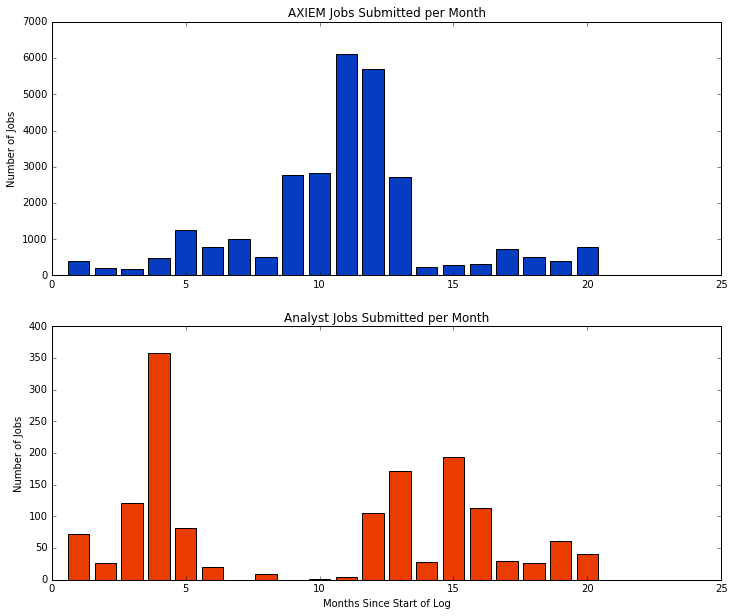

In [6]:
axiem_bym = sim[sim.simulator=='AXIEM'].groupby('sub_month')
analyst_bym = sim[sim.simulator=='Analyst'].groupby('sub_month')
fig = plt.gcf()
fig.set_size_inches(12,10)
axiem = axiem_bym.submitted_date.count()
analyst = analyst_bym.submitted_date.count()
plt.figure(1)
plt.subplot(211)
plt.bar(axiem.index-0.4, axiem, .8, color=c_xem)
plt.title('AXIEM Jobs Submitted per Month')
plt.ylabel('Number of Jobs')
plt.subplot(212)
plt.bar(analyst.index-0.4, analyst, .8, color=c_ana)
plt.title('Analyst Jobs Submitted per Month')
plt.xlabel('Months Since Start of Log')
plt.ylabel('Number of Jobs')
plt.show()

### Simulation Time per Month

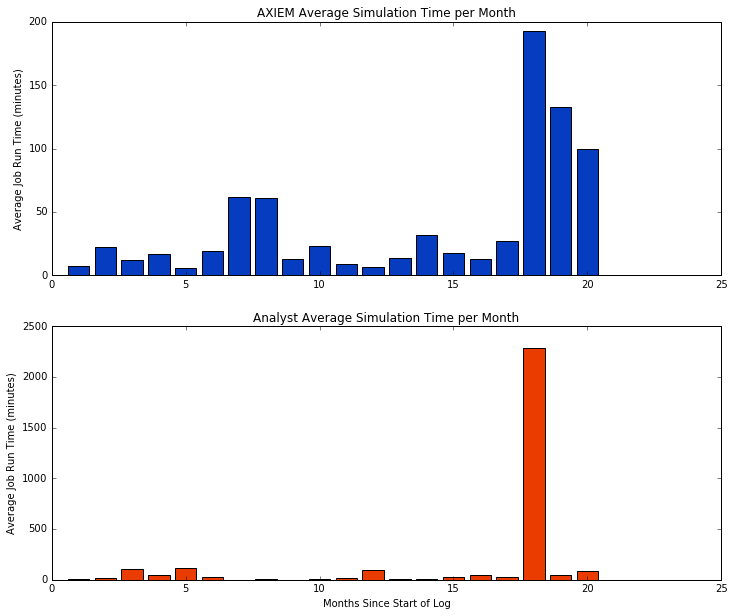

In [7]:
fig = plt.gcf()
fig.set_size_inches(12,10)
axiem = axiem_bym.duration_m.mean()
analyst = analyst_bym.duration_m.mean()
plt.figure(1)
plt.subplot(211)
plt.bar(axiem.index-0.4, axiem, .8, color=c_xem)
plt.title('AXIEM Average Simulation Time per Month')
plt.ylabel('Average Job Run Time (minutes)')
plt.subplot(212)
plt.bar(analyst.index-0.4, analyst, .8, color=c_ana)
plt.title('Analyst Average Simulation Time per Month')
plt.xlabel('Months Since Start of Log')
plt.ylabel('Average Job Run Time (minutes)')
plt.show()

### Simulation Durations

To get a better idea what simulations look like, here have selected time range intervals to break the simulations into
and plot the number of simulations in those range bins.

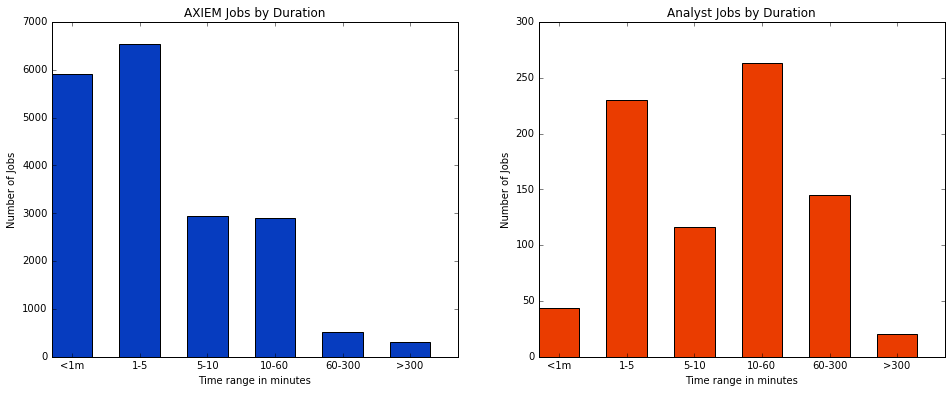

In [8]:
bins = [0, 1, 5, 10, 60, 300, 5000]
comp = js_pd.successful_jobs(sim)
axiem, bins = np.histogram(comp[comp.simulator=='AXIEM'].duration_m, bins=bins)
analyst, bins = np.histogram(comp[comp.simulator=='Analyst'].duration_m, bins=bins)

fig = plt.gcf()
fig.set_size_inches(16,6)

plt.subplot(121)
plt.bar(np.arange(len(bins)-1), axiem, .6, color=c_xem)
plt.gca().set_xticklabels(['<1m', '1-5', '5-10', '10-60', '60-300', '>300'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.xlabel('Time range in minutes')
plt.ylabel('Number of Jobs')
plt.title('AXIEM Jobs by Duration')

plt.subplot(122)
plt.bar(np.arange(len(bins)-1), analyst, .6, color=c_ana)
plt.gca().set_xticklabels(['<1m', '1-5', '5-10', '10-60', '60-300', '>300'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.title('Analyst Jobs by Duration')
plt.xlabel('Time range in minutes')
plt.ylabel('Number of Jobs')
plt.show()

### Memory Used

In the same way we can select memory ranges for the peak memory used by the simulations. Because there is such a large range of memory requirements, we have plotted the large jobs separately.

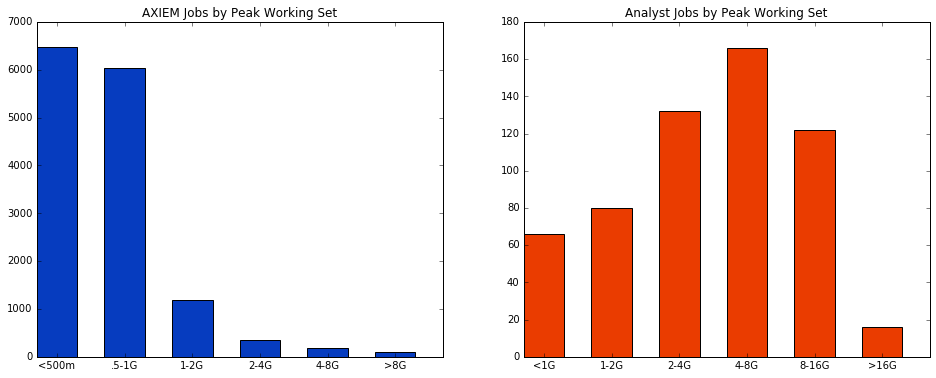

In [9]:
comp_v12 = comp[ comp.working_set.notnull()]  # to looks at mem only keep v12

bins1 = [0, 500, 1000, 2000, 4000, 8000, 90000]
axiem, bins = np.histogram(comp_v12[comp_v12.simulator=='AXIEM'].working_set, bins=bins1)
bins2 = [0, 1000, 2000, 4000, 8000, 16000, 90000]
analyst, bins = np.histogram(comp_v12[comp_v12.simulator=='Analyst'].working_set, bins=bins2)

fig = plt.gcf()
fig.set_size_inches(16,6)


plt.subplot(121)
plt.bar(np.arange(len(bins1)-1), axiem, .6, color=c_xem)
plt.gca().set_xticklabels(['<500m', '.5-1G', '1-2G', '2-4G', '4-8G', '>8G'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.title('AXIEM Jobs by Peak Working Set')


plt.subplot(122)
plt.bar(np.arange(len(bins2)-1), analyst, .6, color=c_ana)
plt.gca().set_xticklabels(['<1G', '1-2G', '2-4G', '4-8G', '8-16G', '>16G'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.title('Analyst Jobs by Peak Working Set')
plt.show()

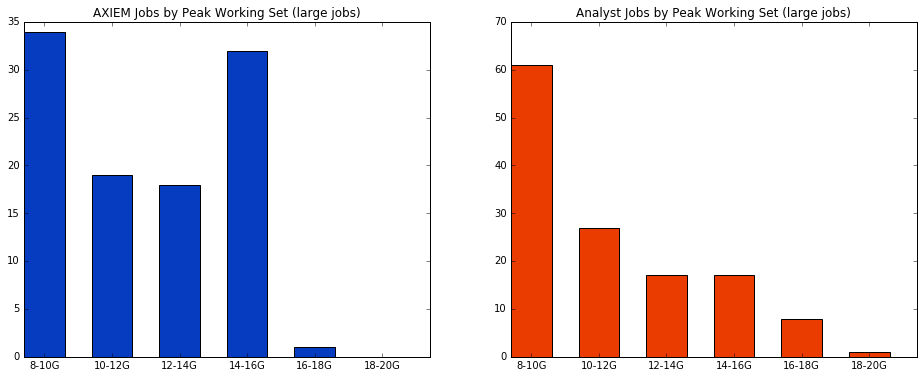

In [10]:
# Look at large memory jobs only
comp_large = comp[ comp.working_set >= 8000]  # to looks at mem only keep v12

bins1 = list(range(8000, 21000, 2000))
axiem, bins = np.histogram(comp_large[comp_large.simulator=='AXIEM'].working_set, bins=bins1)
bins2 = list(range(8000, 21000, 2000))
analyst, bins = np.histogram(comp_large[comp_large.simulator=='Analyst'].working_set, bins=bins2)

fig = plt.gcf()
fig.set_size_inches(16,6)


plt.subplot(121)
plt.bar(np.arange(len(bins1)-1), axiem, .6, color=c_xem)
plt.gca().set_xticklabels(['8-10G', '10-12G', '12-14G', '14-16G', '16-18G', '18-20G'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.title('AXIEM Jobs by Peak Working Set (large jobs)')


plt.subplot(122)
plt.bar(np.arange(len(bins2)-1), analyst, .6, color=c_ana)
plt.gca().set_xticklabels(['8-10G', '10-12G', '12-14G', '14-16G', '16-18G', '18-20G'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.title('Analyst Jobs by Peak Working Set (large jobs)')
plt.show()

### Memory versus Runtime

To get an appreciation of whether simulation time and memory consumption are related we plot the jobs runtime vs memory used.  Below each dot represents one completed simulation.

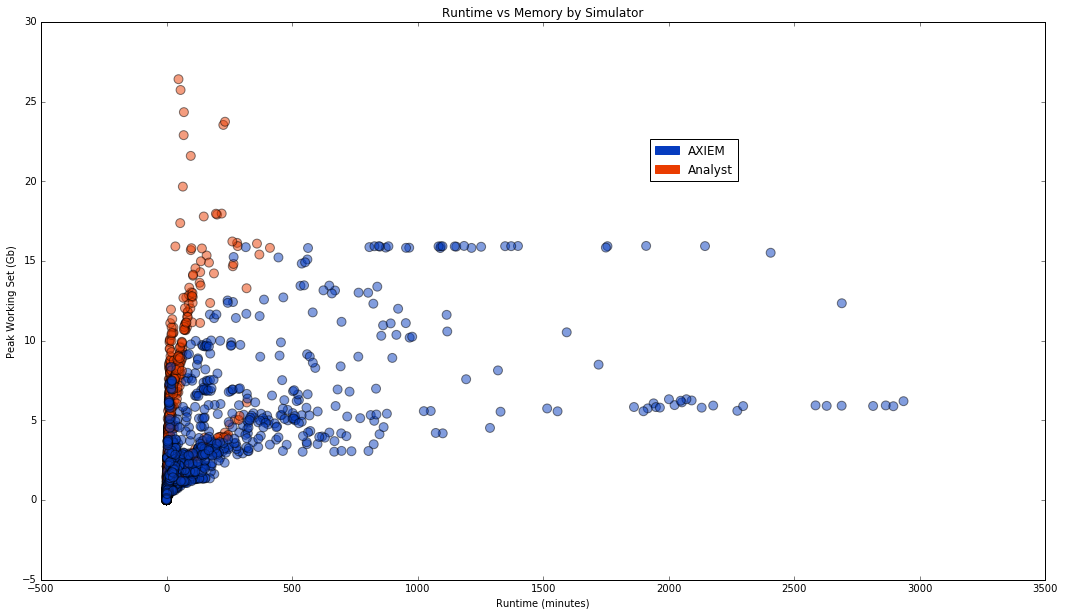

In [11]:
fig = plt.gcf()
fig.set_size_inches(18,10) 
d = comp_v12[ comp_v12.duration_m < 3000 ]
color = d.simulator.apply(lambda x: c_xem if x=='AXIEM' else c_ana)
plt.scatter(d.duration_m, d.working_set/1000, c=color, s=80, alpha=0.5)
plt.ylabel('Peak Working Set (Gb)')
plt.xlabel('Runtime (minutes)')
plt.title('Runtime vs Memory by Simulator')
xem_patch = mpatches.Patch(color=c_xem, label='AXIEM')
ana_patch = mpatches.Patch(color=c_ana, label='Analyst')
plt.legend(handles=[xem_patch, ana_patch], bbox_to_anchor=[0.7,0.8])
plt.show()

### Memory versus Time

Another point of interest is seeing the memory used over time to see if jobs are gettng larger.  We can see this by plotting the peak memory per job versus the day (the number of days since the log started). 

*Note:* Since memory statistics are only available in Version 12 of AWRDE this chart does not start at day 1.

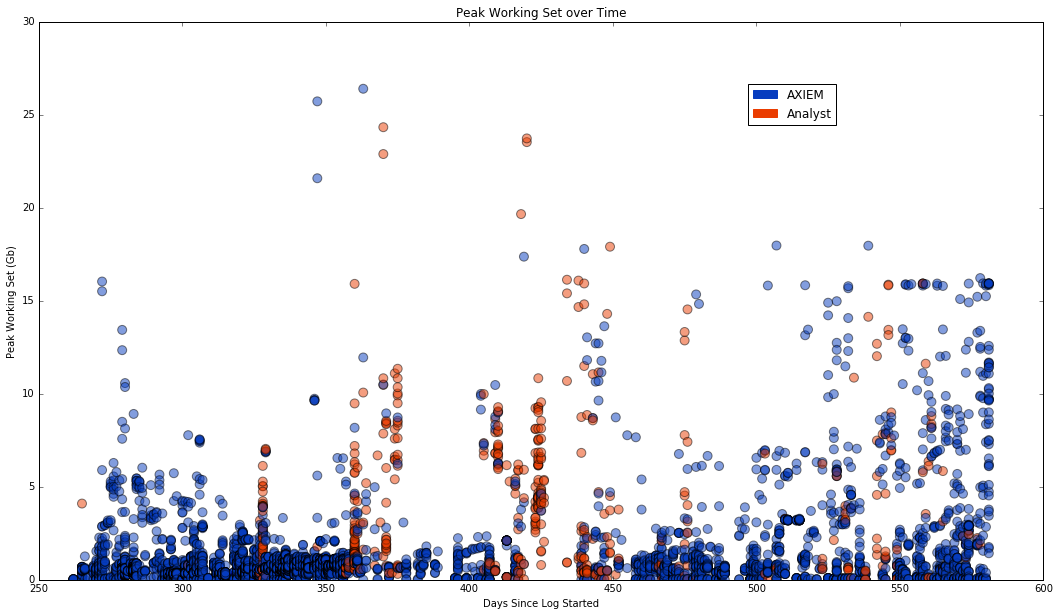

In [12]:
fig = plt.gcf()
fig.set_size_inches(18,10) 
x = comp.submitted_date.apply(lambda x: (x-comp.ix[0].submitted_date).days)
color = d.simulator.apply(lambda x: c_xem if x=='AXIEM' else c_ana)
plt.scatter(x, comp.working_set/1000, c=color, s=80, alpha=0.5)
plt.ylabel('Peak Working Set (Gb)')
plt.xlabel('Days Since Log Started')
plt.title('Peak Working Set over Time')
plt.xlim([250,600])
plt.ylim([0,30])
xem_patch = mpatches.Patch(color=c_xem, label='AXIEM')
ana_patch = mpatches.Patch(color=c_ana, label='Analyst')
plt.legend(handles=[xem_patch, ana_patch], bbox_to_anchor=[0.8,0.9])
plt.show()

### Queue Wait Times

Here we look at the wait time, defined as the time from job submission until simulation starts. This gives us a perspective at what could be saved with additional simulation resources.

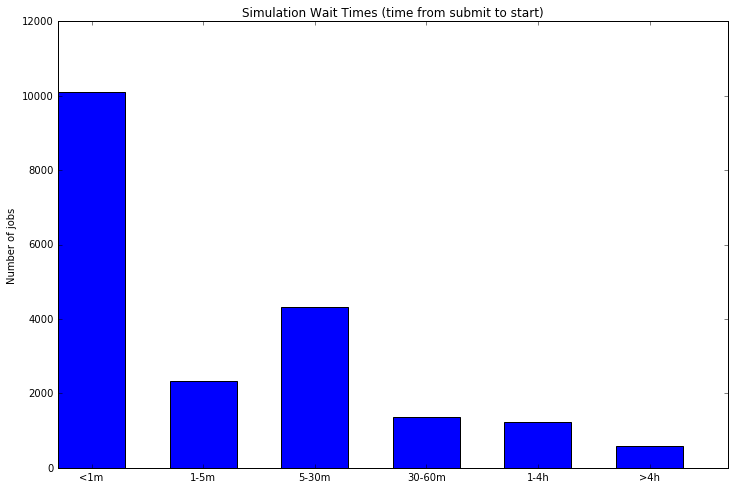

Total wait time was 11,180 hours


In [13]:
fig = plt.gcf()
fig.set_size_inches(12,8)
bins = [0, 1, 5, 30, 60, 240, 20000]
data, bins = np.histogram(comp.wait_m, bins=bins)
plt.bar(np.arange(len(bins)-1), data, .6)
plt.gca().set_xticklabels(['<1m', '1-5m', '5-30m', '30-60m', '1-4h', '>4h'])
plt.gca().set_xticks(np.arange(len(bins)-1)+.3)
plt.title('Simulation Wait Times (time from submit to start)')
plt.ylabel('Number of jobs')
plt.show()
print('Total wait time was {:,} hours'.format(int(sim.wait_m.sum()/60.0)))

### Change in Wait Times

We can also look at how wait times in a month vary over time by looking at the total wait time per month.

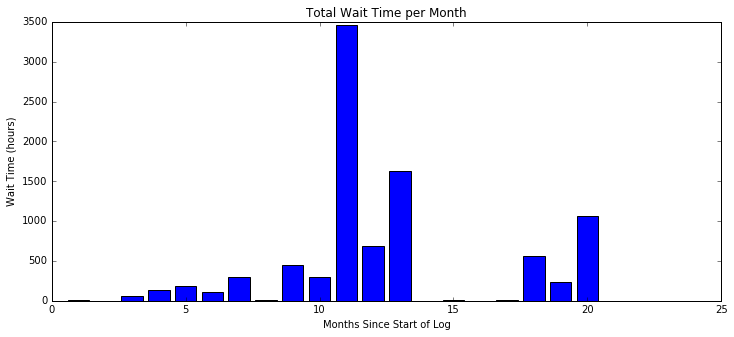

In [14]:
data = comp.groupby('sub_month')
fig = plt.gcf()
fig.set_size_inches(12,5)
total_wait = data.wait_m.sum() / 60.

plt.bar(total_wait.index-0.4, total_wait, .8)
plt.title('Total Wait Time per Month')
plt.ylabel('Wait Time (hours)')
plt.xlabel('Months Since Start of Log')
plt.show()

# Job Completion Statistics

### Jobs by Exit Type

In [15]:
js_pd.jobs_by_type(sim)

,Total,Analyst,AXIEM
Cancelled by User,4536,476,4060
Completed Successfully,20039,818,19221
Host Reassigned,3930,72,3858
Jobs Submitted,29685,1462,28202
Other Disposition,766,76,690
Scheduler Shutdown,414,20,373


# Data by User

Here are some breakdowns by user.

### Simulation Time

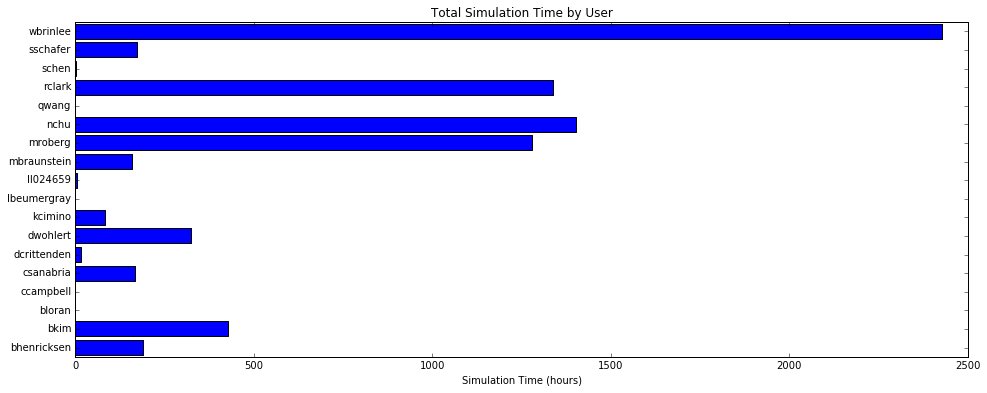

In [16]:
by_user = comp.groupby('user')
by_user_hours = by_user.duration_m.sum() / 60.0
pos = np.arange(len(by_user_hours))+.5
fig = plt.gcf()
fig.set_size_inches(16,6)     
plt.barh(pos,by_user_hours, align='center')
plt.yticks(pos, by_user_hours.index)
plt.xlabel('Simulation Time (hours)')
plt.title('Total Simulation Time by User')
plt.show()

### Number of Jobs

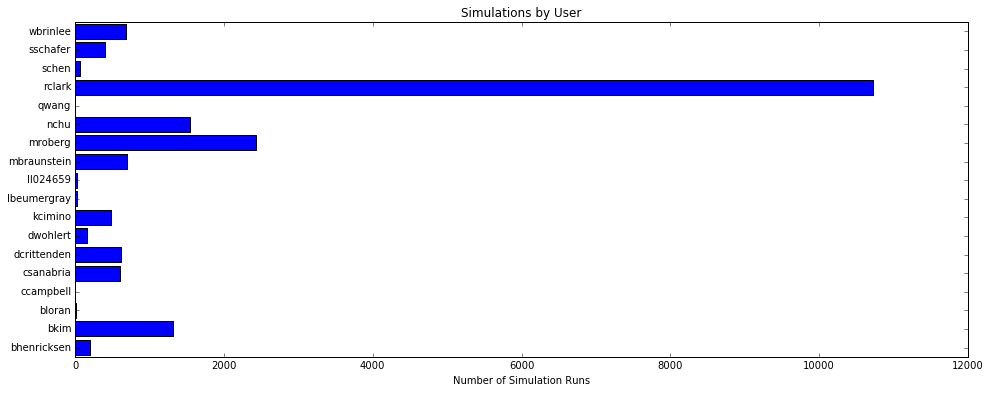

In [17]:
by_user = comp.groupby('user')
by_user_hours = by_user.user.count()
pos = np.arange(len(by_user_hours))+.5
fig = plt.gcf()
fig.set_size_inches(16,6)     
plt.barh(pos,by_user_hours, align='center')
plt.yticks(pos, by_user_hours.index)
plt.xlabel('Number of Simulation Runs')
plt.title('Simulations by User')
plt.show()

### Usage over Time

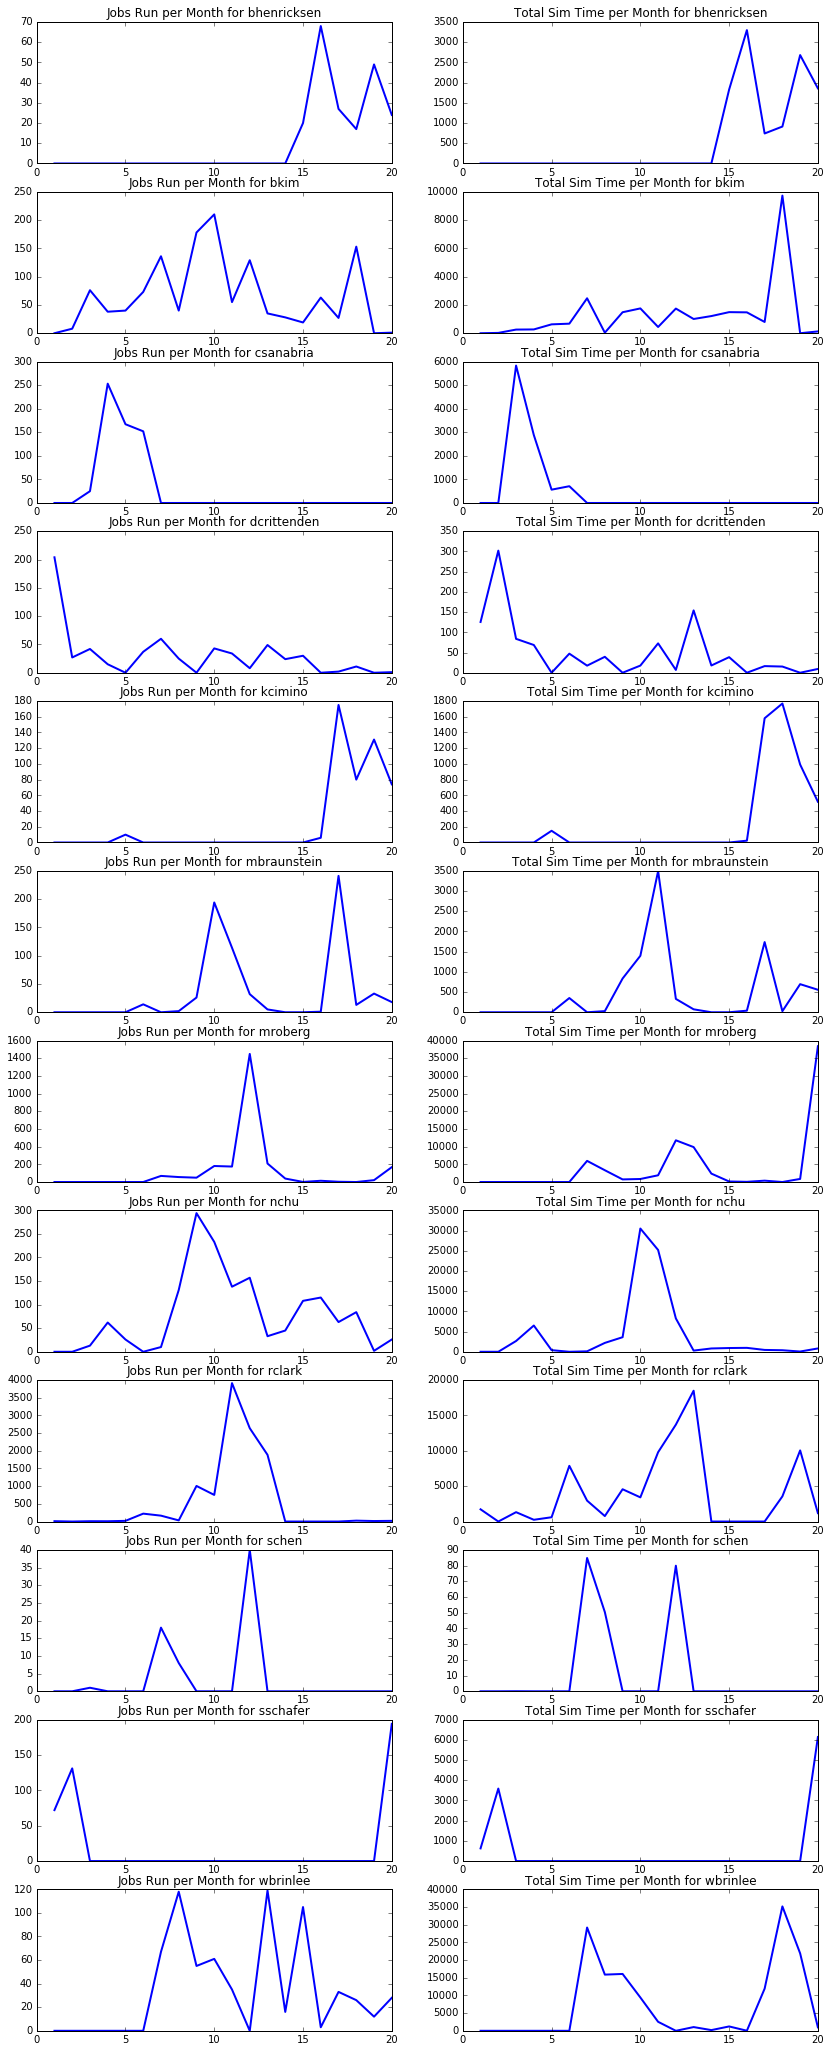

In [18]:
data = comp[~comp.user.isin(['qwang','ccampbell','bloran','lbeumergray', 'll024659', 'dwohlert'])]
x=pd.pivot_table(data, index=['user'], columns='sub_month', values='duration_m', aggfunc=len, fill_value=0)
y=pd.pivot_table(data, index=['user'], columns='sub_month', values='duration_m', aggfunc=sum, fill_value=0)
graphs = len(x.index)
j=1
plt.figure(1, figsize=(14,graphs*3))
for user in x.index:
    plt.subplot(graphs, 2, j)
    j += 1
    plt.plot(x.T[user], linewidth=2)
    plt.title('Jobs Run per Month for {}'.format(user))
    plt.subplot(graphs, 2, j)
    j += 1
    plt.plot(y.T[user], linewidth=2)
    plt.title('Total Sim Time per Month for {}'.format(user))
plt.show()

# Data by Computer

### Simulation Time

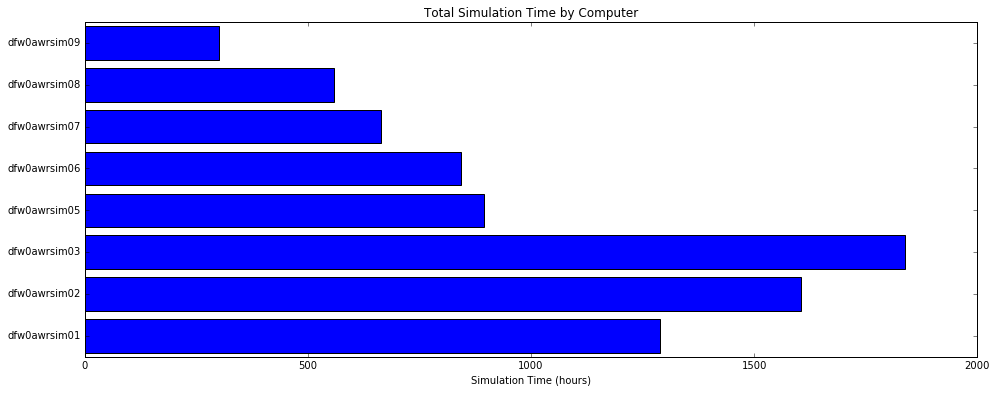

In [19]:
by_host = comp[comp.host != 'local service'].groupby('host')
by_host_hours = by_host.duration_m.sum() / 60.0
pos = np.arange(len(by_host_hours))+.5
fig = plt.gcf()
fig.set_size_inches(16,6)     
plt.barh(pos,by_host_hours, align='center')
plt.yticks(pos, by_host_hours.index)
plt.xlabel('Simulation Time (hours)')
plt.title('Total Simulation Time by Computer')
plt.show()

### Number of Jobs

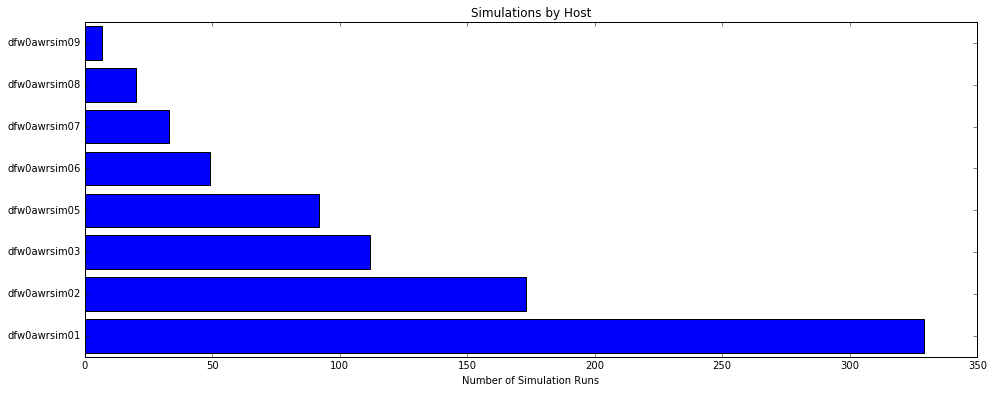

In [20]:
by_host = comp[(comp.host != 'local service') & (comp.simulator == 'Analyst')].groupby('host')
by_host_count = by_host.host.count()
pos = np.arange(len(by_host_count))+.5
fig = plt.gcf()
fig.set_size_inches(16,6)     
plt.barh(pos,by_host_count, align='center')
plt.yticks(pos, by_host_count.index)
plt.xlabel('Number of Simulation Runs')
plt.title('Simulations by Host')
plt.show()

# How Averages Change Over Time

The scatter plot of memory does a good job of tracking evolution of the large jobs over time but
does not give us much insight on the average job.  For this a box plot can provide more insight.

*Note:* Since there are a large number of outliers these graphs are zoomed in (in the Y direction) to 
allow the boxes to be clearly seen.

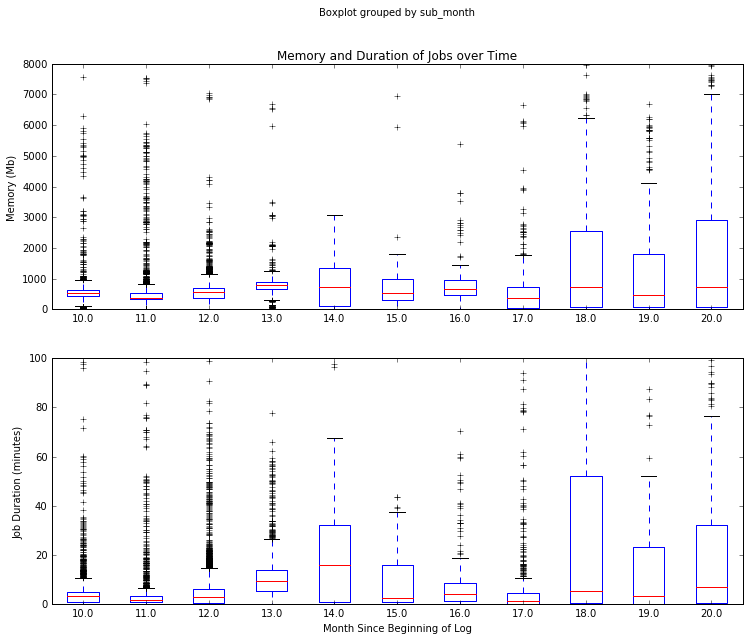

In [21]:
data = sim[(sim.simulator=='AXIEM') & (sim.sub_month >= 10)]
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(12,10)
ax = data.boxplot(column='working_set', by='sub_month', ax=ax1, grid=False)
ax.set_xlabel('')
ax.set_ylabel('Memory (Mb)')
ax.set_ylim([0,8000])
ax.set_title('Memory and Duration of Jobs over Time')

ax = data.boxplot(column='duration_m', by='sub_month', ax=ax2, grid=False)
ax.set_xlabel('Month Since Beginning of Log')
ax.set_ylabel('Job Duration (minutes)')
ax.set_ylim([0,100])
ax.set_title('')

plt.show()

# Network Copy Performance

After a simulation is done the results must be copied back to the user.  Over a typical network this time is small but is it network dependent. An interesting thing to look at is the average time to copy results back per day (since network problems tend to last longer than just 1 job).

In this case, we combine all the successful jobs by day and look at the number of jobs, the average copy time in minutes and the longest copy time in minutes. Then we just keep the days where the average copy time was over 1 minute.


In [22]:
piv = pd.pivot_table(comp, index=["start_date"], values=['results_copy_m'],
                     aggfunc=[len, np.mean, max], fill_value=0)
piv[piv['mean']['results_copy_m'] > 1]

,len,mean,max
,results_copy_m,results_copy_m,results_copy_m
start_date,,,
2015-05-23,7,1.407143,2.72
2015-05-24,15,1.822000,4.00
2015-05-25,11,2.420909,4.28
2015-06-02,913,1.564414,29.48
2015-06-07,8,4.896250,6.02
2015-06-08,11,1.900000,6.88
2015-06-09,11,1.444545,5.02
2015-06-10,10,3.332000,5.90


from this we see that that coy times are largely insignificant on most days but there are specific days when something is going wrong.  This is something that may be correlated with networking issues.  The recommendation here is to collect more data from users and see if this data tracks with other networking issues or if it is perculiar to the job scheduler.

# Final Notes

The raw data is available as a CSV file to allow you to perform additional analysis.

This section provides some of the above data in tabular form for those interested.

**NOTE: In the tables below 'len' is an abbreviation for lenght and denotes the count.  For example in the first table the 'len duration_m' denotes the number of jobs.  Likewise, 'sum duration_m' denotes the total sum of the durations in minutes.**

### User Information

In [23]:
pd.pivot_table(sim, index=['user'],  columns=['simulator'], values=['duration_m'], aggfunc=[len, sum, np.median], fill_value=0)

len                sum               median        
            duration_m         duration_m           duration_m        
simulator        AXIEM Analyst      AXIEM   Analyst      AXIEM Analyst
user                                                                  
bhenricksen         10     267     119.24  11761.54     23.050  37.630
bkim              1551       5   26972.77     12.31      2.100   3.370
bloran               9       1       1.01      3.72      0.100   3.720
ccampbell            6       0     663.18      0.00      0.735   0.000
csanabria         1641     384    1143.80  12371.58      0.830  32.900
dcrittenden        912     243     535.11    844.40      0.120   3.600
dwohlert           189       1   19704.17      3.78      5.400   3.780
kcimino            617       0    5907.42      0.00      0.740   0.000
lbeumergray         33       1    4043.03      1.68      0.170   1.680
ll024659           112      31       0.00    290.57      0.000   6.440
mbraunstein        896       0   10663.17      0.00      3.285   0.000
mroberg           3135       0   80658.04      0.00      3.215   0.000
nchu              2070     209   75791.19  13462.42      2.950  69.930
qwang                2       0       4.10      0.00      4.100   0.000
rclark           15743       0  101642.64      0.00      2.600   0.000
schen               84      10     183.96     31.19      1.530   2.885
sknapp               0       5       0.00      0.00      0.000   0.000
sschafer           533       0   11436.15      0.00      0.700   0.000
wbrinlee           659     305  180574.45  35553.53     10.230   8.530

### Host Information

In [24]:
pd.pivot_table(sim, index=['host'],  columns=['simulator'], values=['duration_m'], aggfunc=[len, sum, np.median], fill_value=0)

len                sum               median        
              duration_m         duration_m           duration_m        
simulator          AXIEM Analyst      AXIEM   Analyst      AXIEM Analyst
host                                                                    
dfw0awrsim01        6647     510   92490.37  15922.62       0.82    7.48
dfw0awrsim02        3433     270  114986.12  11457.47       2.92   15.22
dfw0awrsim03        3445     182  110067.56   9265.06       2.32   12.38
dfw0awrsim05        2614     107   54753.68  33548.39       3.03    9.05
dfw0awrsim06        2710      60   52202.20   1562.27       2.87   10.55
dfw0awrsim07        2131      41   40616.47   1168.09       3.07   11.07
dfw0awrsim08        1983      22   35158.70    718.95       3.03    6.43
dfw0awrsim09        1718      11   19753.52    682.44       2.37   59.08
local service         27       3      14.81     11.43       0.18    3.58

### Simulator Information

In [25]:
pd.pivot_table(sim, index=['simulator'],  values=['duration_m'], aggfunc=[len, sum, np.median], fill_value=0)

,len,sum,median
,duration_m,duration_m,duration_m
simulator,,,
AXIEM,28202,520043,2.42
Analyst,1462,74337,10.30
